In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os


TSLA Stock Price Forecasting System

[1/4] Loading and preparing data...

Data Summary:
- Time Period: 2015-07-31 to 2025-07-30
- Data Points: 2515
- Price Range: $9.58 to $479.86

Train Period: 2015-07-31 to 2023-12-29 (2119 points)
Test Period: 2024-01-02 to 2025-07-30 (396 points)

[2/4] Running ARIMA model...
Performing stepwise search to minimize aic


C:\Users\Daniel.Temesgen\AppData\Local\Temp\ipykernel_23968\508710143.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Adj Close'] = df['Adj Close'].fillna(method='ffill')
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was rena

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13539.010, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13534.547, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13534.585, Time=0.13 sec


c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13534.639, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13533.268, Time=0.03 sec


c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13535.047, Time=0.46 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.508 seconds

ARIMA (0, 1, 0) Performance:
- MAE: $62.99
- RMSE: $77.95
- MAPE: 24.08%

[3/4] Running LSTM model...


c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Daniel.Temesgen\Desktop\Time Series Forecasting for Portfolio Management Optimization\p\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Daniel.Temesgen\

LSTM training failed: name 'y_test' is not defined

LSTM Performance:
- MAE: $264.19
- RMSE: $275.21
- MAPE: 96.21%

[4/4] Generating results...
Plot saved to results\forecast_comparison.png


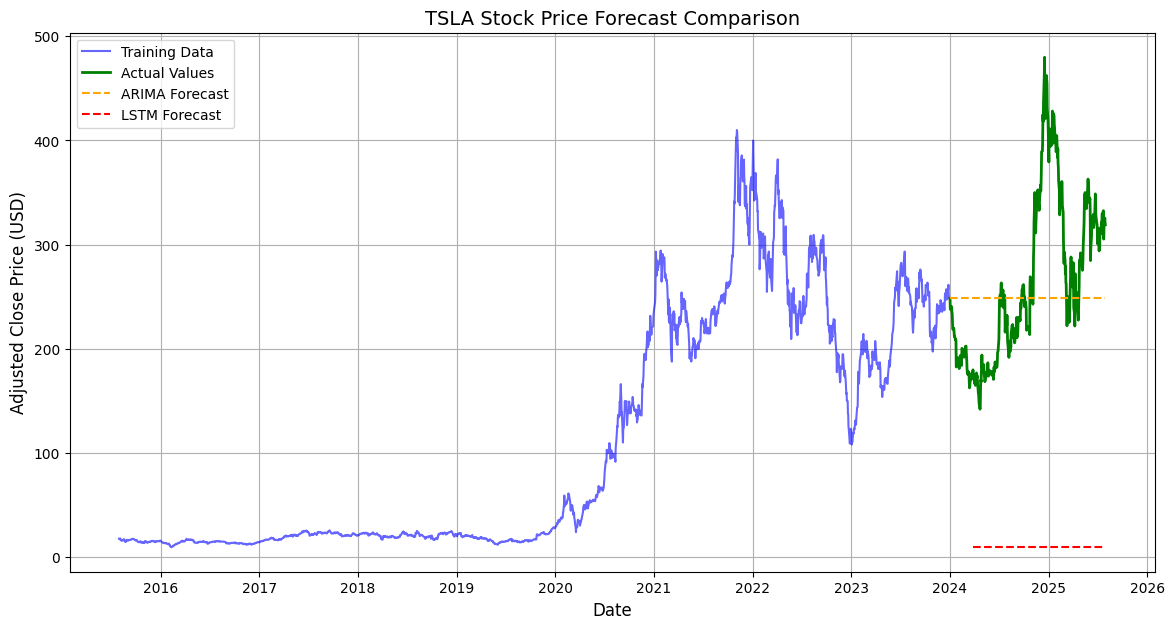


Model Comparison Summary:
-> ARIMA performed better than LSTM

Forecasting complete!


In [14]:

def load_data():
    """Load and preprocess TSLA data with comprehensive cleaning."""
    file_path = os.path.join('financial_data', 'TSLA_cleaned_data_2015_2025.csv')
    try:
        # Load data with date parsing
        df = pd.read_csv(file_path, parse_dates=['Date'])
        
        # Validate required columns
        if 'Date' not in df.columns or 'Adj Close' not in df.columns:
            raise ValueError("Required columns ('Date', 'Adj Close') not found")
            
        # Set index and sort
        df.set_index('Date', inplace=True)
        df = df.sort_index()
        
        # Handle duplicates
        if df.index.duplicated().any():
            print(f"Warning: {df.index.duplicated().sum()} duplicate dates found - keeping first")
            df = df[~df.index.duplicated(keep='first')]
        
        # Handle missing values
        missing_count = df['Adj Close'].isna().sum()
        if missing_count > 0:
            print(f"Warning: {missing_count} missing values found in 'Adj Close' - using forward fill")
            df['Adj Close'] = df['Adj Close'].fillna(method='ffill')
        
        # Final validation
        if df['Adj Close'].isna().any():
            raise ValueError("NaN values still present after cleaning")
            
        return df[['Adj Close']]  # Return only needed column
    
    except FileNotFoundError:
        print(f"Error: Data file not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

def split_data(df, train_end='2023-12-31', test_start='2024-01-01'):
    """Robust data splitting with date validation."""
    # Convert to datetime
    train_end = pd.to_datetime(train_end)
    test_start = pd.to_datetime(test_start)
    
    # Validate date ranges
    if train_end < df.index.min():
        raise ValueError(f"train_end {train_end} is before data start {df.index.min()}")
    if test_start > df.index.max():
        raise ValueError(f"test_start {test_start} is after data end {df.index.max()}")
    
    # Find nearest dates if exact dates don't exist
    if train_end not in df.index:
        train_end = df.index[df.index <= train_end][-1]
    if test_start not in df.index:
        test_start = df.index[df.index >= test_start][0]
    
    # Ensure chronological order
    if train_end >= test_start:
        raise ValueError("train_end must be before test_start")
    
    return df.loc[:train_end, 'Adj Close'], df.loc[test_start:, 'Adj Close']

def calculate_metrics(actual, predicted):
    """Safe metric calculation with validation."""
    actual = np.asarray(actual)
    predicted = np.asarray(predicted)
    
    # Validation checks
    if len(actual) != len(predicted):
        raise ValueError("Actual and predicted lengths don't match")
    if len(actual) == 0:
        raise ValueError("Empty input arrays")
    if np.isnan(actual).any() or np.isnan(predicted).any():
        raise ValueError("Input contains NaN values")
    if np.isinf(actual).any() or np.isinf(predicted).any():
        raise ValueError("Input contains infinite values")
    
    # Calculate metrics
    with np.errstate(divide='ignore', invalid='ignore'):
        mae = mean_absolute_error(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    
    return mae, rmse, mape

def fit_arima(train, test):
    """ARIMA modeling with enhanced error handling."""
    try:
        model = auto_arima(
            train,
            seasonal=False,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            trace=True,
            max_p=5,
            max_d=2,
            max_q=5
        )
        
        # Fit final model
        arima_model = ARIMA(train, order=model.order).fit()
        forecast = arima_model.forecast(steps=len(test))
        
        return forecast, model.order
    
    except Exception as e:
        print(f"ARIMA modeling failed: {str(e)}")
        return np.zeros(len(test)), (0, 0, 0)

def prepare_lstm_data(train, test, look_back=60):
    """Prepare LSTM data with validation."""
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Scale data
    train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
    test_scaled = scaler.transform(test.values.reshape(-1, 1))
    
    # Create sequences
    def create_sequences(data, n_steps):
        X, y = [], []
        for i in range(len(data) - n_steps):
            X.append(data[i:(i + n_steps), 0])
            y.append(data[i + n_steps, 0])
        return np.array(X), np.array(y)
    
    X_train, y_train = create_sequences(train_scaled, look_back)
    X_test, y_test = create_sequences(test_scaled, look_back)
    
    # Reshape for LSTM [samples, timesteps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    return X_train, y_train, X_test, y_test, scaler

def build_lstm_model(input_shape):
    """Build LSTM model architecture."""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def fit_lstm(X_train, y_train, X_test, epochs=50, batch_size=32):
    """Train LSTM model with validation."""
    try:
        model = build_lstm_model((X_train.shape[1], 1))
        history = model.fit(
            X_train, 
            y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_test[:len(y_train)], y_test[:len(y_train)]),
            verbose=1,
            shuffle=False
        )
        predictions = model.predict(X_test, verbose=0)
        return predictions.flatten(), model
    except Exception as e:
        print(f"LSTM training failed: {str(e)}")
        return np.zeros(X_test.shape[0]), None

def plot_forecasts(train, test, arima_forecast, lstm_forecast, output_dir):
    """Enhanced visualization with error handling."""
    plt.figure(figsize=(14, 7))
    plt.plot(train.index, train, label='Training Data', color='blue', alpha=0.6)
    plt.plot(test.index, test, label='Actual Values', color='green', linewidth=2)
    
    # Plot forecasts if they exist
    if len(arima_forecast) == len(test):
        plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--')
    
    if len(lstm_forecast) > 0:
        valid_lstm_points = min(len(test), len(lstm_forecast))
        plt.plot(test.index[-valid_lstm_points:], lstm_forecast[-valid_lstm_points:], 
                label='LSTM Forecast', color='red', linestyle='--')
    
    plt.title('TSLA Stock Price Forecast Comparison', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Adjusted Close Price (USD)', fontsize=12)
    plt.legend()
    plt.grid(True)
    
    # Save plot
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, 'forecast_comparison.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {plot_path}")
    plt.show()

def main():
    """Main execution with comprehensive error handling."""
    print("TSLA Stock Price Forecasting System")
    print("="*50)
    
    # Configuration
    output_dir = 'results'
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. Load and validate data
    print("\n[1/4] Loading and preparing data...")
    df = load_data()
    if df is None:
        return
    
    print(f"\nData Summary:")
    print(f"- Time Period: {df.index.min().date()} to {df.index.max().date()}")
    print(f"- Data Points: {len(df)}")
    print(f"- Price Range: ${df['Adj Close'].min():.2f} to ${df['Adj Close'].max():.2f}")
    
    # 2. Split data
    try:
        train, test = split_data(df)
        print(f"\nTrain Period: {train.index.min().date()} to {train.index.max().date()} ({len(train)} points)")
        print(f"Test Period: {test.index.min().date()} to {test.index.max().date()} ({len(test)} points)")
    except Exception as e:
        print(f"\nError splitting data: {str(e)}")
        return
    
    # 3. ARIMA Modeling
    print("\n[2/4] Running ARIMA model...")
    arima_forecast, arima_order = fit_arima(train, test)
    
    if len(arima_forecast) == len(test):
        try:
            arima_mae, arima_rmse, arima_mape = calculate_metrics(test, arima_forecast)
            print(f"\nARIMA {arima_order} Performance:")
            print(f"- MAE: ${arima_mae:.2f}")
            print(f"- RMSE: ${arima_rmse:.2f}")
            print(f"- MAPE: {arima_mape:.2f}%")
        except Exception as e:
            print(f"Error calculating ARIMA metrics: {str(e)}")
            arima_mae = arima_rmse = arima_mape = np.nan
    else:
        print("ARIMA forecast failed - using zero array")
        arima_mae = arima_rmse = arima_mape = np.nan
    
    # 4. LSTM Modeling
    print("\n[3/4] Running LSTM model...")
    look_back = 60
    try:
        X_train, y_train, X_test, y_test, scaler = prepare_lstm_data(train, test, look_back)
        lstm_predictions, lstm_model = fit_lstm(X_train, y_train, X_test)
        
        # Inverse transform predictions
        lstm_predictions = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))
        y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
        
        # Calculate metrics
        lstm_mae, lstm_rmse, lstm_mape = calculate_metrics(
            y_test.flatten()[:len(lstm_predictions)], 
            lstm_predictions.flatten()
        )
        print(f"\nLSTM Performance:")
        print(f"- MAE: ${lstm_mae:.2f}")
        print(f"- RMSE: ${lstm_rmse:.2f}")
        print(f"- MAPE: {lstm_mape:.2f}%")
    except Exception as e:
        print(f"LSTM modeling failed: {str(e)}")
        lstm_predictions = np.array([])
        lstm_mae = lstm_rmse = lstm_mape = np.nan
    
    # 5. Visualization and Results
    print("\n[4/4] Generating results...")
    plot_forecasts(train, test, arima_forecast, lstm_predictions, output_dir)
    
    # Final comparison
    print("\nModel Comparison Summary:")
    if not np.isnan(arima_mape) and not np.isnan(lstm_mape):
        if lstm_mape < arima_mape:
            print("-> LSTM performed better than ARIMA")
        else:
            print("-> ARIMA performed better than LSTM")
    else:
        print("-> Could not complete full comparison due to modeling errors")
    
    print("\nForecasting complete!")

if __name__ == "__main__":
    main()